In [2]:
import pandas as pd
import numpy as np

database = 'Diabetes'
df_nn = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/neural_network_classification_{database}_cv_5.csv')
df_nystrom_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_ridge_classification_{database}_cv_5.csv')
df_rbf_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/RBF_and_ridge_classification_{database}_cv_5.csv')

In [4]:
nn_accuracy = df_nn.accuracy_test.to_list()
nn_training_time = df_nn.training_time.to_list()
nn_labels = list(map(lambda x: 'NN of shape '+str(x),df_nn.hidden_layer_sizes.to_list()))
df_nn.head()

,hidden_layer_sizes,best_params,best_accuracy_cv,training_time,accuracy_test,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp_classification__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,"(644,)",{'mlp_classification__alpha': 1.0},0.780114,0.944271,0.744589,[4.04302421 3.74332881 3.09742899 3.32120318 3...,[0.83998227 0.70278527 0.39245799 0.40948103 0...,[0.00063815 0.00112681 0.00056863 0.0007586 0...,[2.16105630e-05 5.66020779e-04 1.42469814e-05 ...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.78703704 0.81481481 0.75 0.76851852 0...,[0.71296296 0.72222222 0.72222222 0.74074074 0...,[0.71962617 0.76635514 0.74766355 0.74766355 0...,[0.71962617 0.68224299 0.71962617 0.72897196 0...,[0.76635514 0.72897196 0.75700935 0.72897196 0...,[0.7411215 0.74292143 0.73930426 0.74297335 0...,[0.02987298 0.04477212 0.01534125 0.01463978 0...,[7 6 8 5 4 3 1 2 9 9 9 9 9 9]
1,"(25, 25)",{'mlp_classification__alpha': 1.0},0.776428,0.661707,0.735931,[1.03745346 1.04997921 1.0870141 0.99095526 1...,[0.12025421 0.08454533 0.12980001 0.15907878 0...,[0.00042238 0.00041022 0.00040984 0.00050135 0...,[2.17495250e-05 8.48529010e-06 8.24252717e-06 ...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.74074074 0.75925926 0.66666667 0.72222222 0...,[0.74074074 0.74074074 0.73148148 0.69444444 0...,[0.71962617 0.71028037 0.72897196 0.6728972 0...,[0.68224299 0.71028037 0.64485981 0.75700935 0...,[0.72897196 0.71028037 0.72897196 0.64485981 0...,[0.72246452 0.72616822 0.70019038 0.6982866 0...,[0.0216158 0.02032066 0.03693563 0.03882031 0...,[4 3 6 8 5 2 1 7 9 9 9 9 9 9]
2,"(8, 8, 8)",{'mlp_classification__alpha': 1e-06},0.769107,0.766600,0.692641,[0.44117489 0.54641919 0.63938627 0.52434149 0...,[0.08408453 0.18140659 0.31125874 0.04798882 0...,[0.00057902 0.0003963 0.00044522 0.00039606 0...,[3.28865244e-04 4.52216634e-06 1.02498762e-04 ...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.78703704 0.76851852 0.75925926 0.66666667 0...,[0.74074074 0.76851852 0.72222222 0.74074074 0...,[0.78504673 0.71962617 0.71962617 0.75700935 0...,[0.75700935 0.69158879 0.71028037 0.69158879 0...,[0.77570093 0.71962617 0.75700935 0.73831776 0...,[0.76910696 0.73357563 0.73367947 0.71886466 0...,[0.01772027 0.03031198 0.02037101 0.03400178 0...,[1 5 4 7 6 2 3 8 8 8 8 8 8 8]


In [5]:
nn_accuracy,nn_training_time,nn_labels

([0.7445887445887446, 0.7359307359307359, 0.6926406926406926],
 [0.9442708492279052, 0.6617071628570557, 0.7665998935699463],
 ['NN of shape (644,)', 'NN of shape (25, 25)', 'NN of shape (8, 8, 8)'])

In [6]:
df_nystrom_and_ridge

,n_components,best_params,best_accuracy_cv,training_time,accuracy_test,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_nystroem__gamma,param_ridge_classification__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10,"{'nystroem__gamma': 0.015625, 'ridge_classific...",0.776497,0.004543,0.770563,[0.00381937 0.0046752 0.00257936 0.00297976 0...,[2.55878124e-05 1.07413841e-03 1.34007663e-03 ...,[0.00051146 0.00053539 0.00048022 0.00089183 0...,[4.05283534e-06 3.53341160e-05 2.66557516e-05 ...,[0.0001220703125 0.0001220703125 0.00012207031...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'nystroem__gamma': 0.0001220703125, 'ridge_c...",[0.82407407 0.81481481 0.77777778 0.65740741 0...,[0.72222222 0.72222222 0.72222222 0.65740741 0...,[0.71962617 0.72897196 0.73831776 0.6635514 0...,[0.82242991 0.8317757 0.80373832 0.6635514 0...,[0.74766355 0.75700935 0.76635514 0.6635514 0...,[0.76720318 0.77095881 0.76168224 0.6610938 0...,[0.04680373 0.04462013 0.02881877 0.00300993 0...,[ 7 3 9 19 19 5 4 10 15 19 2 8 1 6 19 ...
1,20,"{'nystroem__gamma': 0.0013810679320049757, 'ri...",0.783974,0.001856,0.757576,[0.00160809 0.00153484 0.00142694 0.00152583 0...,[1.65383694e-04 9.59257946e-05 2.80370517e-05 ...,[0.00049763 0.00045829 0.00044303 0.00045371 0...,[8.53609636e-05 1.61642873e-05 1.32500683e-05 ...,[0.0001220703125 0.0001220703125 0.00012207031...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'nystroem__gamma': 0.0001220703125, 'ridge_c...",[0.81481481 0.81481481 0.77777778 0.65740741 0...,[0.72222222 0.72222222 0.72222222 0.65740741 0...,[0.72897196 0.72897196 0.73831776 0.6635514 0...,[0.8317757 0.8317757 0.80373832 0.6635514 0...,[0.74766355 0.75700935 0.76635514 0.6635514 0...,[0.76908965 0.77095881 0.76168224 0.6610938 0...,[0.04535503 0.04462013 0.02881877 0.00300993 0...,[ 6 5 9 18 18 7 1 8 15 18 3 2 4 10 18 ...
2,50,"{'nystroem__gamma': 0.1767766952966369, 'ridge...",0.782018,0.217932,0.744589,[0.01115155 0.00562325 0.00640602 0.00443406 0...,[5.27005898e-03 4.63709515e-03 4.34644985e-03 ...,[0.00245543 0.00089235 0.00137329 0.00069742 0...,[2.83002231e-03 4.90527773e-04 1.31917640e-03 ...,[0.0001220703125 0.0001220703125 0.00012207031...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'nystroem__gamma': 0.0001220703125, 'ridge_c...",[0.82407407 0.81481481 0.77777778 0.65740741 0...,[0.71296296 0.72222222 0.72222222 0.65740741 0...,[0.72897196 0.72897196 0.73831776 0.6635514 0...,[0.8411215 0.8411215 0.80373832 0.6635514 0...,[0.76635514 0.75700935 0.76635514 0.6635514 0...,[0.77469713 0.77282797 0.76168224 0.6610938 0...,[0.05063944 0.04724705 0.02881877 0.00300993 0...,[ 5 7 11 18 18 2 6 10 15 18 4 8 3 9 18 ...
3,100,"{'nystroem__gamma': 0.0013810679320049757, 'ri...",0.783939,0.552632,0.757576,[0.00608335 0.00726476 0.00610967 0.00439405 0...,[3.00710611e-03 3.12343433e-03 4.48605450e-03 ...,[0.00156956 0.00188046 0.00134435 0.00089288 0...,[1.13465074e-03 1.52750411e-03 1.23711813e-03 ...,[0.0001220703125 0.0001220703125 0.00012207031...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'nystroem__gamma': 0.0001220703125, 'ridge_c...",[0.82407407 0.81481481 0.77777778 0.65740741 0...,[0.71296296 0.72222222 0.72222222 0.65740741 0...,[0.72897196 0.72897196 0.73831776 0.6635514 0...,[0.8411215 0.8411215 0.80373832 0.6635514 0...,[0.76635514 0.75700935 0.76635514 0.6635514 0...,[0.77469713 0.77282797 0.76168224 0.6610938 0...,[0.05063944 0.04724705 0.02881877 0.00300993 0...,[ 3 5 12 19 19 1 4 9 15 19 7 6 2 8 19 ...
4,200,"{'nystroem__gamma': 0.015625, 'ridge_classific...",0.785756,0.479588,0.753247,[0.01327553 0.01784124 0.01988592 0.01825256 0...,[0.00303115 0.00628244 0.01050379 0.00882273 0...,[0.00216603 0.00251594 0.00162539 0.00092297 0...,[1.28658041e-03 1.65333711e-03 1.00382205e-03 ...,[0.0001220703125 0.0001220703125 0.00012207031...,[0.0001 0.0031622776601683794 0.1 3.1622776601

In [7]:
df_rbf_and_ridge

,n_components,best_params,best_accuracy_cv,training_time,accuracy_test,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rbf_sampler__gamma,param_ridge_classification__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge...",0.774697,0.002514,0.744589,[0.00171142 0.00172358 0.00196033 0.00150275 0...,[8.17069063e-05 7.80798679e-05 8.98117293e-04 ...,[0.00034885 0.00036178 0.00052013 0.00030923 0...,[2.17958922e-05 2.16279164e-05 4.09054155e-04 ...,['scale' 'scale' 'scale' 'scale' 'scale' 0.000...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'rbf_sampler__gamma': 'scale', 'ridge_classi...",[0.75925926 0.73148148 0.75 0.69444444 0...,[0.57407407 0.59259259 0.67592593 0.67592593 0...,[0.72897196 0.71028037 0.6728972 0.6635514 0...,[0.72897196 0.71962617 0.77570093 0.73831776 0...,[0.59813084 0.63551402 0.69158879 0.73831776 0...,[0.67788162 0.67789893 0.71322257 0.70211146 0...,[0.0761301 0.05428529 0.04181225 0.03115489 0...,[18 17 11 12 19 5 1 10 22 22 4 2 9 16 22 ...
1,20,"{'rbf_sampler__gamma': 0.0013810679320049757, ...",0.772811,0.002026,0.783550,[0.00151138 0.00153842 0.00135679 0.00139256 0...,[7.37310217e-05 1.33887910e-04 8.78927950e-05 ...,[0.00032964 0.00036674 0.0003294 0.00046029 0...,[6.59622821e-06 2.93533456e-05 1.16358037e-05 ...,['scale' 'scale' 'scale' 'scale' 'scale' 0.000...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'rbf_sampler__gamma': 'scale', 'ridge_classi...",[0.75 0.75925926 0.78703704 0.76851852 0...,[0.55555556 0.64814815 0.67592593 0.67592593 0...,[0.73831776 0.76635514 0.69158879 0.71962617 0...,[0.70093458 0.70093458 0.71962617 0.71028037 0...,[0.69158879 0.68224299 0.71028037 0.73831776 0...,[0.68727934 0.71138802 0.71689166 0.72253375 0...,[0.06941901 0.04532335 0.03818373 0.03064187 0...,[18 16 15 12 20 5 2 14 20 20 1 7 4 19 20 ...
2,50,"{'rbf_sampler__gamma': 0.0013810679320049757, ...",0.772793,0.001757,0.774892,[0.00165267 0.00428014 0.00262918 0.01200991 0...,[1.73178394e-04 1.72668500e-03 1.53934638e-03 ...,[0.00035262 0.00114436 0.00049758 0.0027895 0...,[1.18088219e-05 7.63501696e-04 2.86529659e-04 ...,['scale' 'scale' 'scale' 'scale' 'scale' 0.000...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'rbf_sampler__gamma': 'scale', 'ridge_classi...",[0.78703704 0.77777778 0.77777778 0.80555556 0...,[0.73148148 0.76851852 0.74074074 0.7037037 0...,[0.73831776 0.74766355 0.79439252 0.71962617 0...,[0.72897196 0.73831776 0.72897196 0.71962617 0...,[0.70093458 0.71962617 0.72897196 0.75700935 0...,[0.73734856 0.75038075 0.75417099 0.74110419 0...,[0.0279301 0.02087256 0.02692733 0.0366834 0...,[13 10 6 12 20 5 3 15 20 20 8 1 2 19 20 ...
3,100,"{'rbf_sampler__gamma': 0.0013810679320049757, ...",0.769107,0.063238,0.783550,[0.00206194 0.0021688 0.00301204 0.00198917 0...,[1.08062663e-04 6.03327862e-04 1.40106411e-03 ...,[0.00042367 0.00041304 0.00071483 0.00042725 0...,[7.83668487e-06 1.43405158e-05 3.63287032e-04 ...,['scale' 'scale' 'scale' 'scale' 'scale' 0.000...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'rbf_sampler__gamma': 'scale', 'ridge_classi...",[0.76851852 0.74074074 0.75925926 0.77777778 0...,[0.67592593 0.67592593 0.72222222 0.73148148 0...,[0.70093458 0.71028037 0.72897196 0.71962617 0...,[0.71028037 0.71028037 0.72897196 0.79439252 0...,[0.74766355 0.75700935 0.73831776 0.76635514 0...,[0.72066459 0.71884735 0.73554863 0.75792662 0...,[0.03321926 0.02801676 0.0129148 0.02814655 0...,[16 17 12 8 20 3 2 14 20 20 6 4 1 19 20 ...
4,200,"{'rbf_sampler__gamma': 0.0013810679320049757, ...",0.767203,0.142450,0.774892,[0.00811996 0.00712838 0.00910454 0.00568624 0...,[5.80632365e-03 3.65151210e-03 1.08709223e-02 ...,[0.0007381 0.00116978 0.00061545 0.00222616 0...,[1.76451617e-04 1.00076391e-03 4.64074522e-05 ...,['scale' 'scale' 'scale' 'scale' 'scale' 0.000...,[0.0001 0.0031622776601683794 0.1

Relevant information for KNVA



In [9]:
nn_accuracy.append(0.850991953811191)
nn_training_time.append(59.80529022216797)
nn_labels.append('KSVM')

In [10]:
from plotting import plot_comparatives

# Time analysis adults data set

Conclusion: Radom features win. 

Use Wilcolxon .

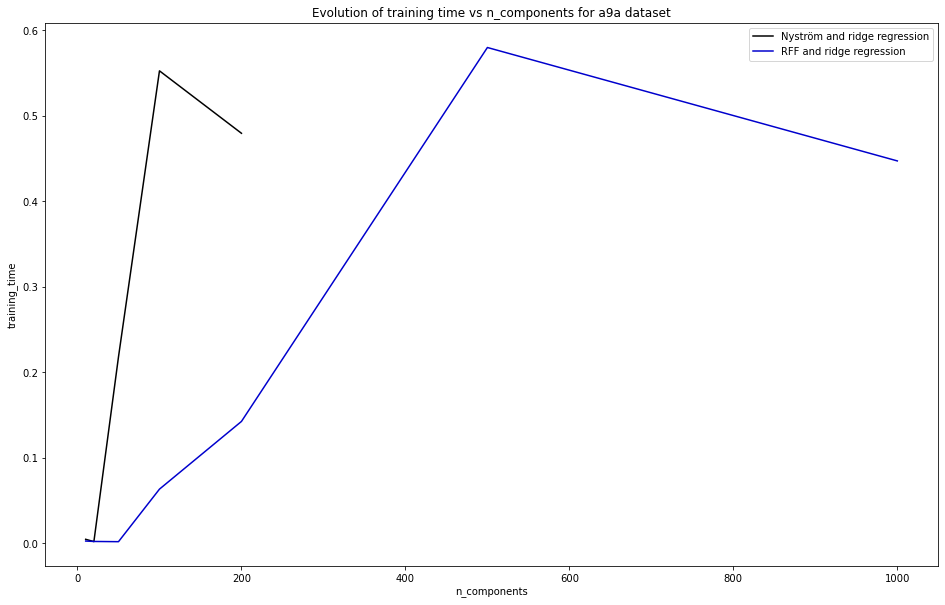

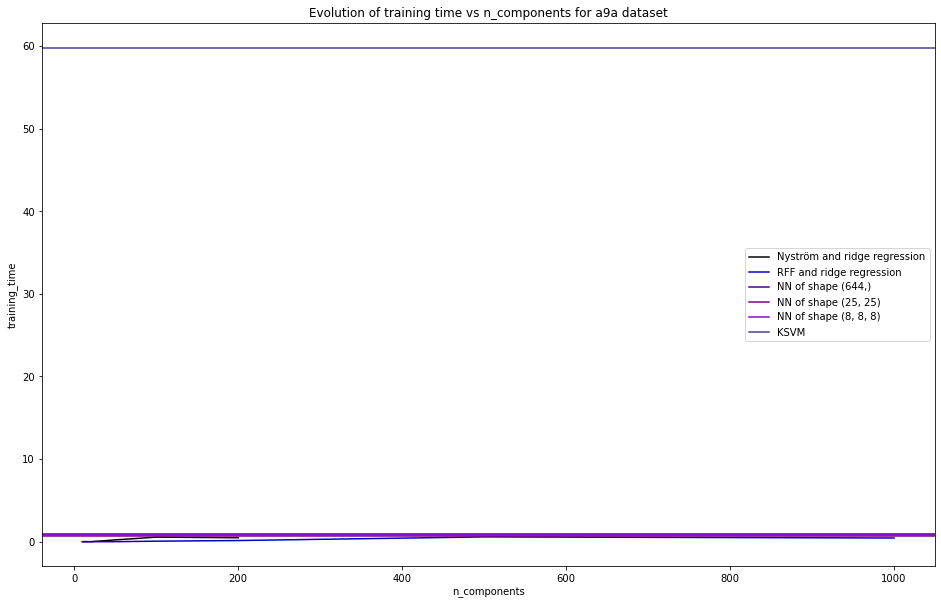

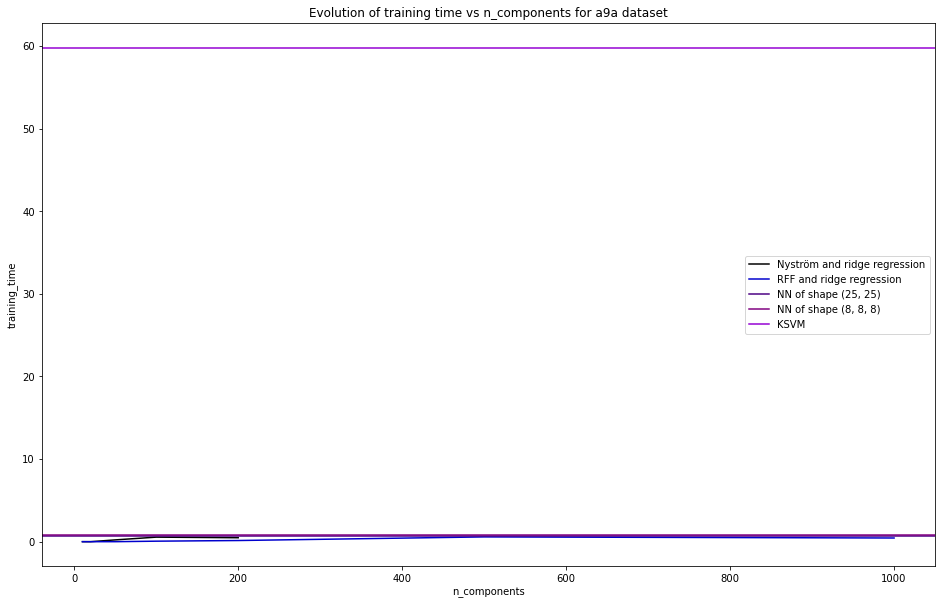

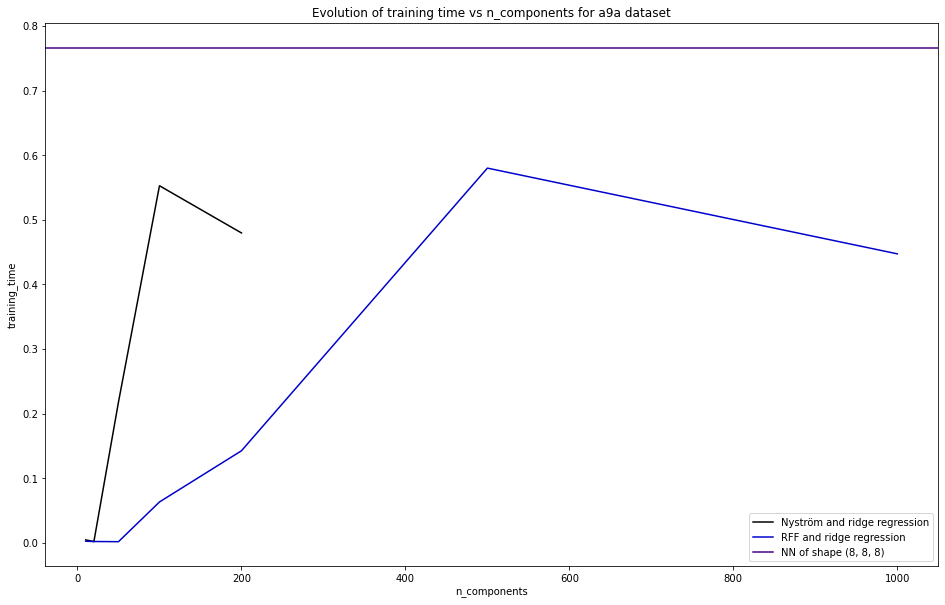

In [11]:

column = 'training_time'
df_with_n_components = [df_nystrom_and_ridge, df_rbf_and_ridge]
df_labels = ['Nyström and ridge regression', 'RFF and ridge regression']
title = 'Evolution of training time vs n_components for a9a dataset'

plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[2:-1], nn_labels[2:-1], False)

# TODO separate
# rm nn and add svc linear
# ksvm 
# rr Nystrom + rfb linear 
# usar intelet

# Accuracy 

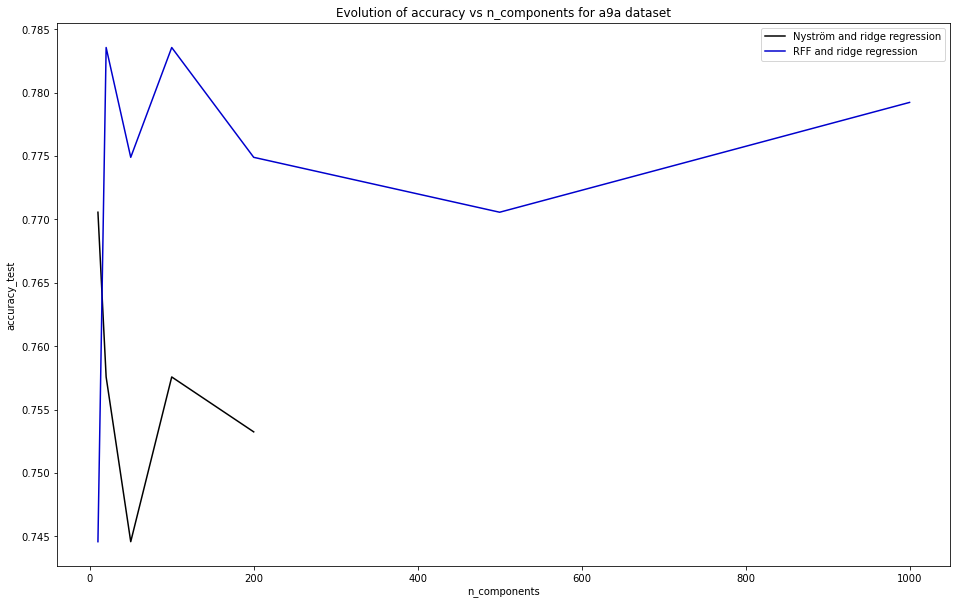

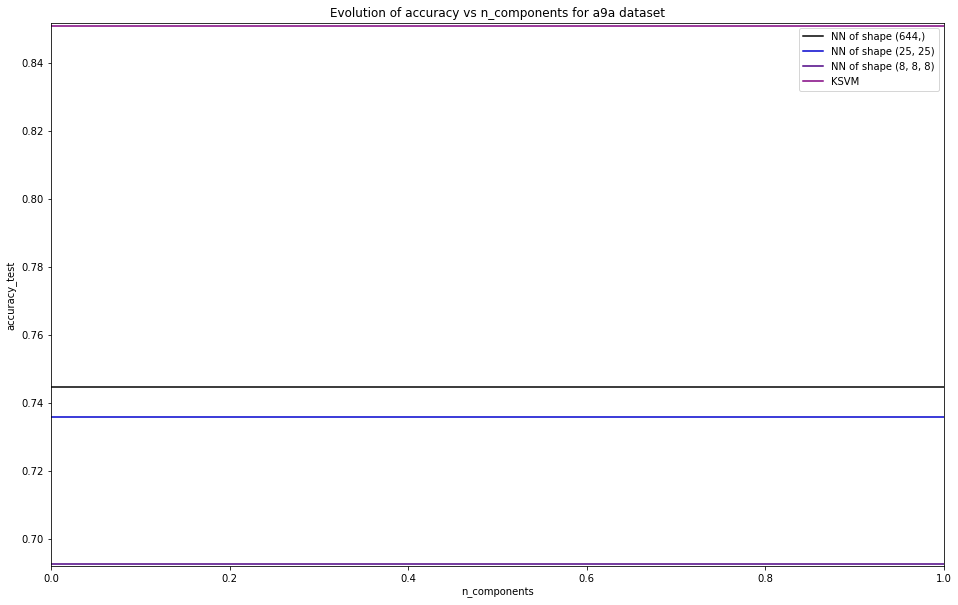

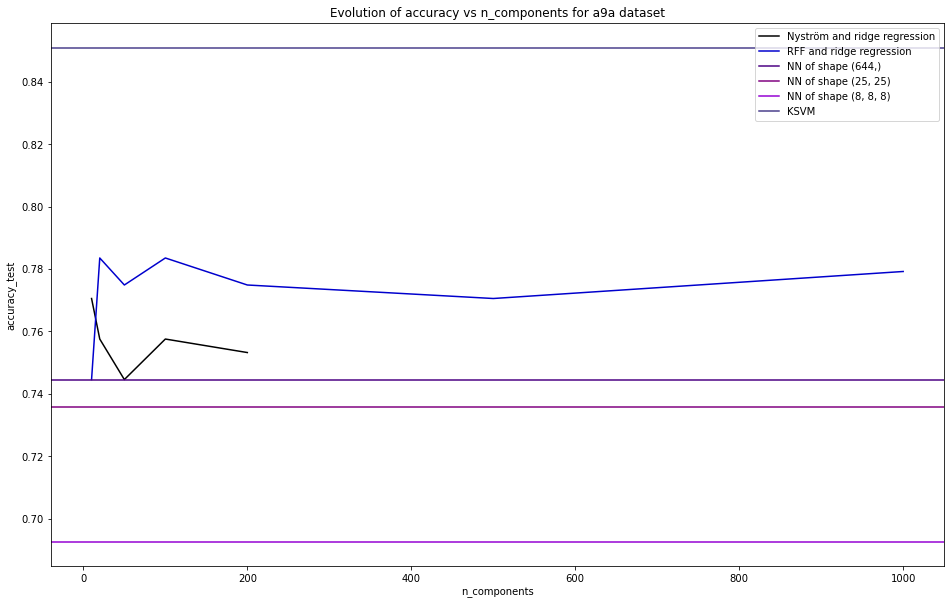

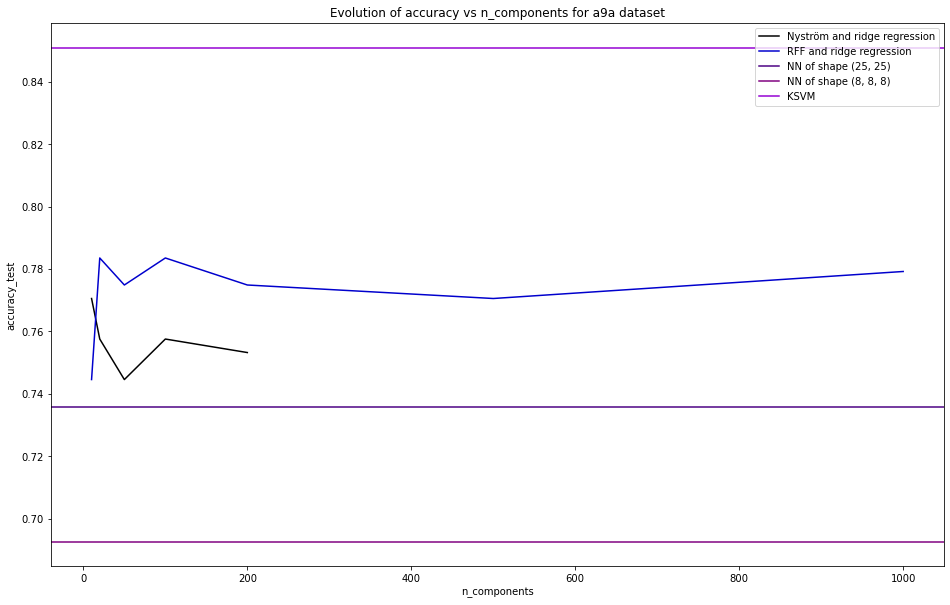

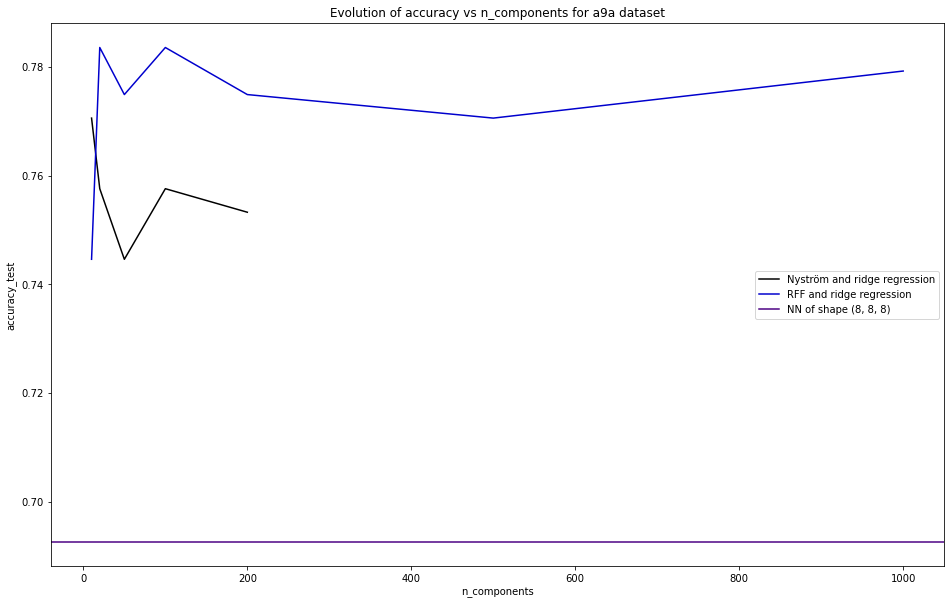

In [12]:
column = 'accuracy_test'

df_labels = ['Nyström and ridge regression', 'RFF and ridge regression']
title = 'Evolution of accuracy vs n_components for a9a dataset'
constant_data = nn_accuracy
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[2:-1], nn_labels[2:-1], False)


# Damping


Formula: 

$$damping = \frac{accuracy}{time} \times 100$$

The bigger the best

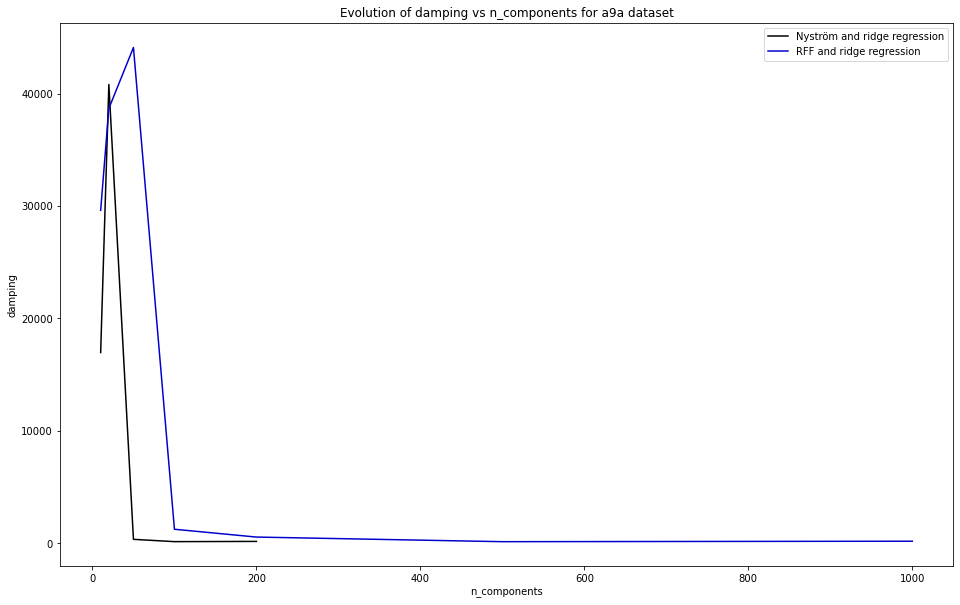

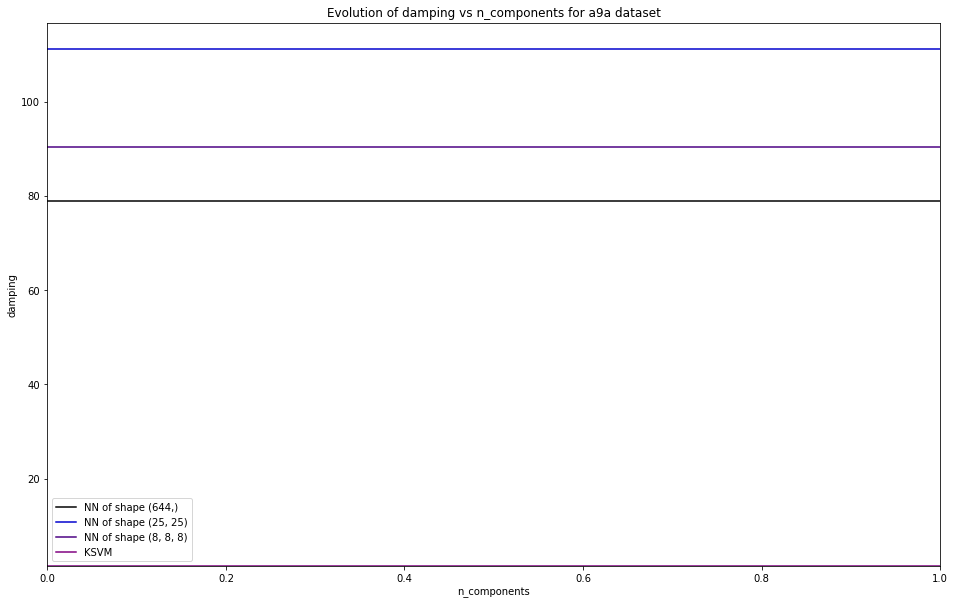

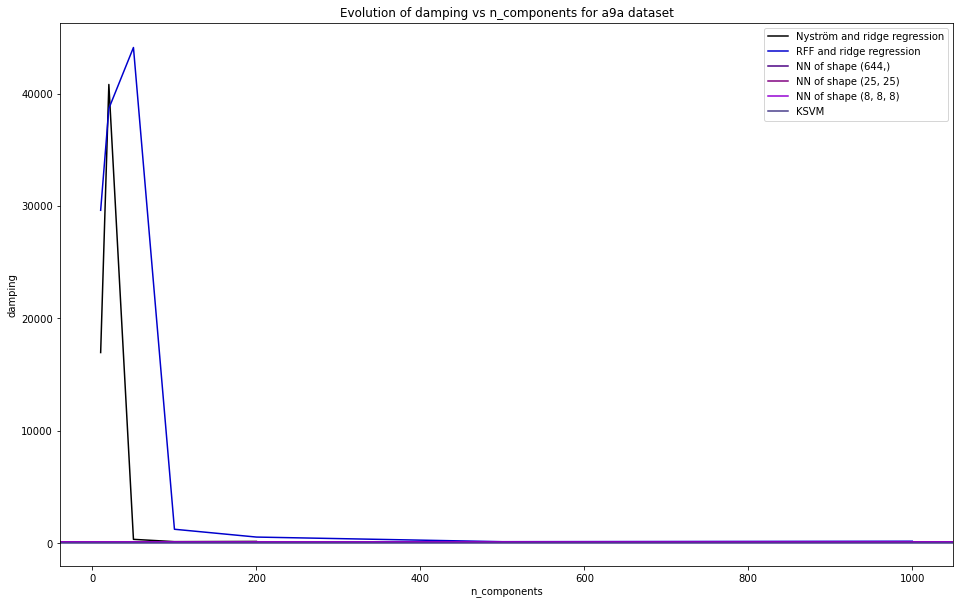

In [13]:
# Computing damping
constant_damping = [acc / time*100 for acc,time in zip(nn_accuracy, nn_training_time)]
damping_column = 'damping'
for df in df_with_n_components:
    df['damping'] = df.accuracy_test / df.training_time * 100

# Plotting

column = damping_column
title = 'Evolution of damping vs n_components for a9a dataset'
constant_data = constant_damping
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False, constant_margin=0.05)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)